## Initialise the environment

In [1]:
from fastbook import *
from fastai.vision.widgets import *

## Build the datablock from directory names

In [2]:
path = Path('/home/streicher/.fastai/data/familyphotos_small/')

In [3]:
fns = get_image_files(path)
fns

(#26044) [Path('/home/streicher/.fastai/data/familyphotos_small/180/Mixed_Childhood_0456.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Willem_Israel_0138.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/FN34_RESCAN_32.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Streicher_Slides_S0737.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/FN6_RESCAN_22.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Streicher_Slides_S0271.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Streicher_Slides_S1531.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Hiking_Otter_0010.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/FN41_RESCAN_28.jpg'),Path('/home/streicher/.fastai/data/familyphotos_small/180/Willem_Israel_0065.jpg')...]

In [4]:
photos = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))

In [5]:
dls = photos.dataloaders(path)

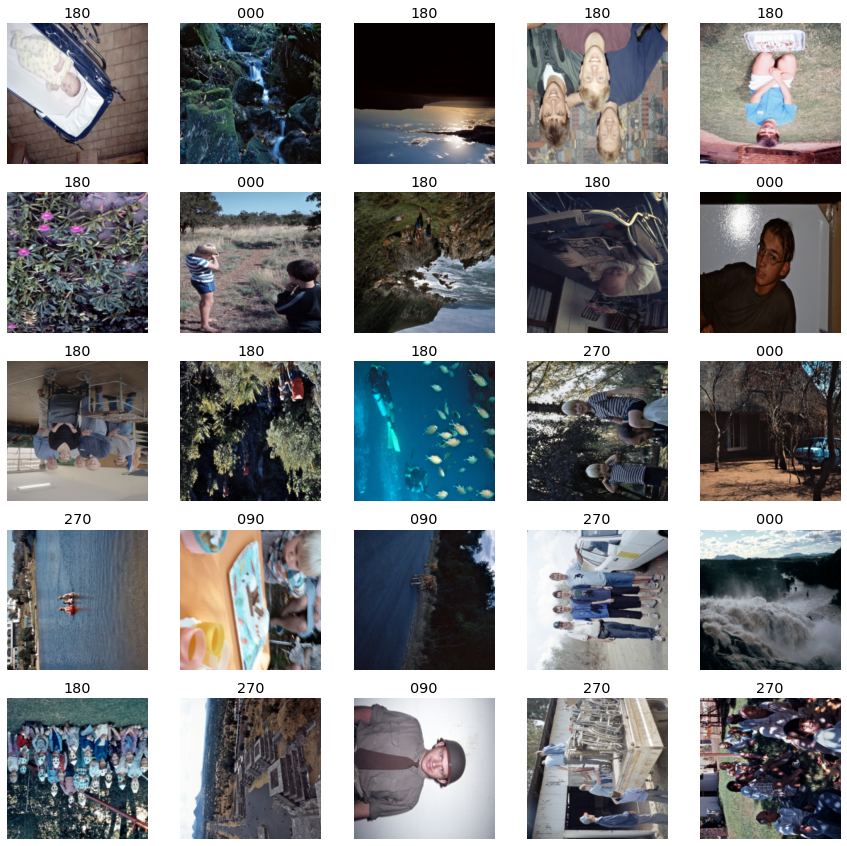

In [6]:
dls.valid.show_batch(max_n=25, nrows=5)

## Train The Model

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Minimum/10: 8.32e-03, steepest point: 5.25e-03


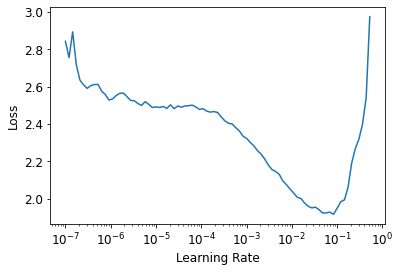

In [8]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [9]:
learn.fine_tune(25, base_lr=8.32e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.713594,0.508533,0.209485,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.230526,0.151382,0.052995,01:55
1,0.179762,0.156389,0.053571,01:55
2,0.175324,0.144040,0.053187,01:55
3,0.206852,0.194727,0.065092,01:50
4,0.177794,0.178035,0.062596,01:50
5,0.180463,0.162782,0.060100,01:50
6,0.174426,0.162832,0.057028,01:50
7,0.162842,0.150386,0.054531,01:51
8,0.148608,0.157327,0.053571,01:50
9,0.113121,0.136502,0.044547,01:50


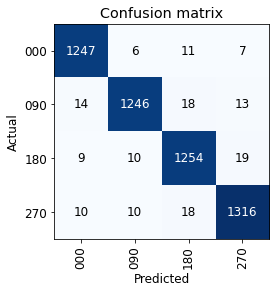

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

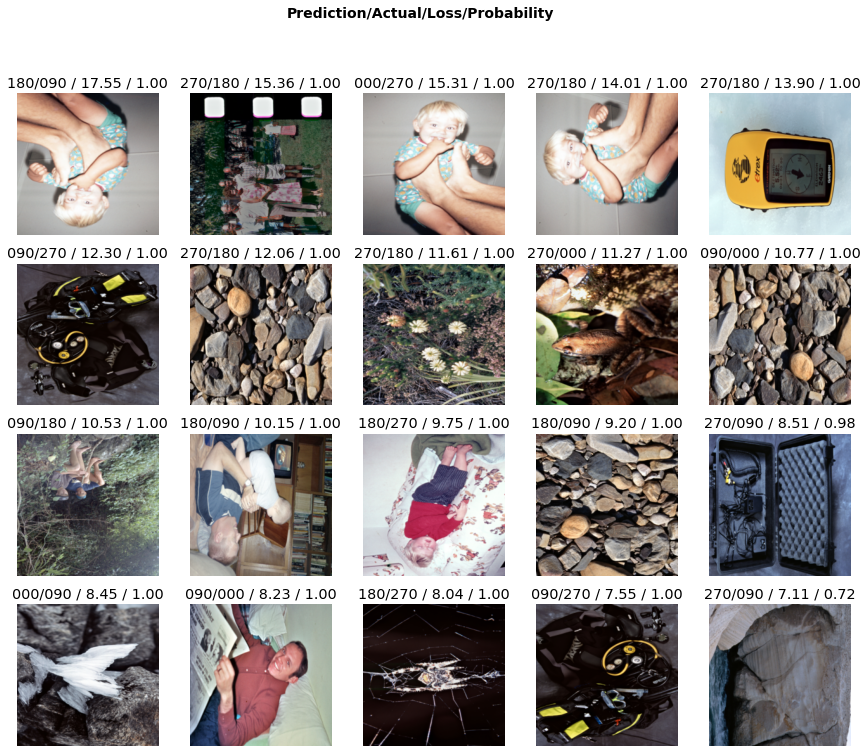

In [11]:
interp.plot_top_losses(20, nrows=4)

In [12]:
learn.export()

## Use the Model for Inference

In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
learn_inf = load_learner('export.pkl')

In [3]:
learn_inf.dls.vocab

['000', '090', '180', '270']

In [4]:
directory_in_str = '/media/streicher/2TB_ExFAT/Family_Slides/'


In [5]:
import os
count=0
for subdir, dirs, files in os.walk(directory_in_str):
    for file in files:
        filepath = subdir +  file
        if (filepath.endswith(".tif") and not file.startswith(".")):
            print ("File to process: " + filepath)
            count=count+1
print ("Files in Total: ", count)          

File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_26.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_44.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_37.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_5.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_20.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_11.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_33.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_33.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_24.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_23.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_37.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_13.jpg
File to process: /media/streicher/2TB_ExFAT/Streicher_Nega

In [6]:
count=0
for subdir, dirs, files in os.walk(directory_in_str):
    for file in files:
        if (file.endswith(".tif") and not file.startswith(".")):
            print ("Old Filename: " + subdir + file)
            pred,pred_idx,probs = learn_inf.predict(subdir + file)
            print ("Predicted Class: " + pred)
            confidence = max(probs)
            percent = float(confidence)        
            print ("Predicted Confidence: ", percent)
            if ( percent < 0.5 ):
                newfilename = subdir + "UNK_" + file
            else:
                newfilename = subdir + pred + "_" + file
            print ("New Filename: " + newfilename)
            os.rename(subdir + file, newfilename)
            count=count+1
            print("************************************")
            print()
print ("Files in Total: ", count)            

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_600_26.jpg


Predicted Class: 180
Predicted Confidence:  0.9214386343955994
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_600_26.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_MRNS_3_44.jpg


Predicted Class: 090
Predicted Confidence:  0.99973064661026
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_MRNS_3_44.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_37.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_122_5.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_122_5.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_217_20.jpg


Predicted Class: 180
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_217_20.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_224_11.jpg


Predicted Class: 180
Predicted Confidence:  0.9999998807907104
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_224_11.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_175_33.jpg


Predicted Class: 000
Predicted Confidence:  1.0
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_175_33.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_198_24.jpg


Predicted Class: 090
Predicted Confidence:  0.9998998641967773
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/090_SN_198_24.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_23.jpg


Predicted Class: 180
Predicted Confidence:  0.999951958656311
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_23.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_153_37.jpg


Predicted Class: 180
Predicted Confidence:  0.9999918937683105
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_153_37.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_139_13.jpg


Predicted Class: 180
Predicted Confidence:  0.9993048906326294
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/180_SN_106_9.jpg
************************************

Old Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/SN_120_17.jpg


Predicted Class: 000
Predicted Confidence:  0.9999802112579346
New Filename: /media/streicher/2TB_ExFAT/Streicher_Negatives/000_SN_120_17.jpg
************************************

Files in Total:  13
